# Importation des données et des bibliothèques

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [110]:
data = pd.read_csv("bird.csv")
data

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW
...,...,...,...,...,...,...,...,...,...,...,...,...
415,415,17.96,1.63,19.25,1.33,18.36,1.54,31.25,1.33,21.99,1.15,SO
416,416,19.21,1.64,20.76,1.49,19.24,1.45,33.21,1.28,23.60,1.15,SO
417,417,18.79,1.63,19.83,1.53,20.96,1.43,34.45,1.41,22.86,1.21,SO
418,418,20.38,1.78,22.53,1.50,21.35,1.48,36.09,1.53,25.98,1.24,SO


## Analyse des données

In [111]:
print(f"Le nombre d'attributs dans la dataframe est : {data.shape[1]}")
print(f"Le nombre d'observations dans la dataframe est : {data.shape[0]}")

Le nombre d'attributs dans la dataframe est : 12
Le nombre d'observations dans la dataframe est : 420


In [112]:
print("Les statistiques du dataframe avant le pré traitement sont :\n")
data.describe()

Les statistiques du dataframe avant le pré traitement sont :



,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,420.000000,419.000000,419.000000,417.000000,418.000000,418.000000,419.000000,418.000000,419.000000,419.000000,419.000000
mean,209.500000,64.650501,4.370573,69.115372,3.597249,36.872416,3.220883,64.662823,3.182339,39.229976,2.930024
std,121.387808,53.834549,2.854617,58.784775,2.186747,19.979082,2.023581,37.838145,2.080827,23.184313,2.185673
min,0.000000,9.850000,1.140000,14.090000,1.000000,11.830000,0.930000,5.500000,0.870000,7.770000,0.660000
25%,104.750000,25.170000,2.190000,28.050000,1.870000,21.297500,1.715000,36.417500,1.565000,23.035000,1.425000
50%,209.500000,44.180000,3.500000,43.710000,2.945000,31.130000,2.520000,52.120000,2.490000,31.740000,2.230000
75%,314.250000,90.310000,5.810000,97.520000,4.770000,47.120000,4.135000,82.870000,4.255000,50.250000,3.500000
max,419.000000,420.000000,17.840000,422.000000,12.000000,117.070000,11.640000,240.000000,11.030000,175.000000,14.090000


In [113]:
print("Les types de données dans le dataframe sont :\n")
data.dtypes.value_counts()

Les types de données dans le dataframe sont :



float64    10
int64       1
object      1
Name: count, dtype: int64

L'histogramme de la distribution des classes est :


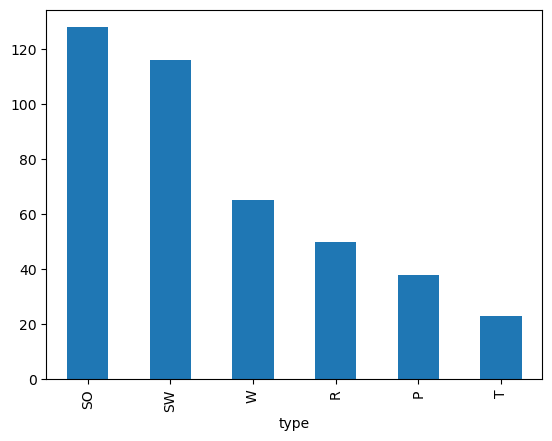

On remarque que les classes sont déséquilibrées et que la classe SO est la plus représentée


In [114]:
counts_by_class = data["type"].value_counts()
counts_by_class.plot(kind='bar')
print("L'histogramme de la distribution des classes est :")
plt.plot()
plt.show()
print("On remarque que les classes sont déséquilibrées et que la classe SO est la plus représentée")

In [115]:
print(f"Le nombre de lignes dupliquées dans le dataframe est : {data.duplicated().sum()}")
print(f"Le nombre de lignes dupliquées dans le dataframe sans la colonne id est : {data.drop('id',axis=1).duplicated().sum()}")

Le nombre de lignes dupliquées dans le dataframe est : 0
Le nombre de lignes dupliquées dans le dataframe sans la colonne id est : 0


Nous avons comparé les lignes dupliquées avec et sans la colonne id qui pourrait inclure un biais sur l'unicité des lignes et nous avons trouvé que les deux valeurs sont les mêmes, donc nous pouvons conclure que le dataframe n'a pas de lignes dupliquées

In [116]:
print(f"Il y a {data.isna().sum().sum()} valeurs manquantes dans notre dataset")

Il y a 15 valeurs manquantes dans notre dataset


In [117]:
print("Le nombre de valeurs manquantes par attribut est :")
data.isna().sum()

Le nombre de valeurs manquantes par attribut est :


id       0
huml     1
humw     1
ulnal    3
ulnaw    2
feml     2
femw     1
tibl     2
tibw     1
tarl     1
tarw     1
type     0
dtype: int64

## Prétraitement des données 

### Traitement des cellules manquantes

La colonne id est unique pour chaque observation, donc on peut la supprimer afin de ne pas fausser les résultats de l'analyse.

In [118]:
data.drop("id", axis=1, inplace=True)

In [119]:
print(f"Il y a maintenant {data.isna().any(axis=1).sum()} cellules manquantes")
data[data.isna().any(axis=1)]

Il y a maintenant 7 cellules manquantes


,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
160,76.43,4.11,86.79,3.84,NaN,NaN,67.13,2.48,41.65,2.10,W
204,63.76,4.74,NaN,NaN,57.33,4.88,75.67,4.33,60.19,3.82,R
207,98.08,7.77,113.04,5.76,82.04,7.17,107.47,6.65,NaN,NaN,R
342,NaN,NaN,NaN,NaN,32.54,2.65,55.06,2.81,38.94,2.25,SO
378,20.10,1.86,NaN,1.52,17.21,1.22,NaN,NaN,18.46,0.91,SO
396,16.51,1.47,20.56,1.43,15.88,1.27,NaN,1.19,17.63,1.02,SO
404,20.36,1.87,22.19,1.60,NaN,1.77,37.47,1.64,25.54,1.34,SO


On peut remplir les valeurs manquantes des attributs numériques par la moyenne des valeurs de chaque attribut au lieu de supprimer les observations qui les contiennent car on ne veut pas perdre des informations importantes.

In [120]:
numeric_columns = data.select_dtypes(exclude = "object").columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

Le nombre de valeurs manquantes dans le dataframe est maintenant de 0.

### Normalisation des labels

Nous avons utilisé la méthode StandardScaler pour normaliser les données.

In [121]:
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
data.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,420.000000,4.200000e+02,4.200000e+02,4.200000e+02
mean,-1.015061e-16,-3.383537e-16,-1.691768e-16,-3.045183e-16,1.691768e-17,-1.353415e-16,0.000000,-3.383537e-17,-4.736952e-16,-1.691768e-17
std,1.001193e+00,1.001193e+00,1.001193e+00,1.001193e+00,1.001193e+00,1.001193e+00,1.001193,1.001193e+00,1.001193e+00,1.001193e+00
min,-1.020375e+00,-1.134405e+00,-9.405375e-01,-1.191987e+00,-1.257932e+00,-1.134798e+00,-1.569191,-1.113915e+00,-1.360193e+00,-1.041074e+00
25%,-7.344680e-01,-7.657012e-01,-7.005119e-01,-7.927073e-01,-7.806022e-01,-7.447071e-01,-0.747699,-7.779106e-01,-6.998765e-01,-6.890849e-01
50%,-3.784571e-01,-3.021874e-01,-4.313431e-01,-2.901656e-01,-2.753931e-01,-3.447086e-01,-0.327239,-3.311093e-01,-3.208077e-01,-3.187507e-01
75%,4.760994e-01,5.036945e-01,4.801303e-01,5.382250e-01,5.137527e-01,4.466197e-01,0.482914,5.155249e-01,4.723508e-01,2.568153e-01
max,6.616543e+00,4.729746e+00,6.031785e+00,3.856377e+00,4.028491e+00,4.170445e+00,4.650512,3.780426e+00,5.870109e+00,5.118169e+00


On transforme ensuite l'attribut catégoriel Type en attribut numérique en utilisant la méthode LabelEncoder.

In [122]:
encoder = LabelEncoder()
encoder.fit(data["type"])
mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
data["type"] = encoder.fit_transform(data["type"])
print(f"La correspondance entre les valeurs numériques et les valeurs catégorielles de l'attribut Type est : {mapping}")

La correspondance entre les valeurs numériques et les valeurs catégorielles de l'attribut Type est : {'P': 0, 'R': 1, 'SO': 2, 'SW': 3, 'T': 4, 'W': 5}


## Exploitation des données

## Analyse de la corrélation

<Axes: >

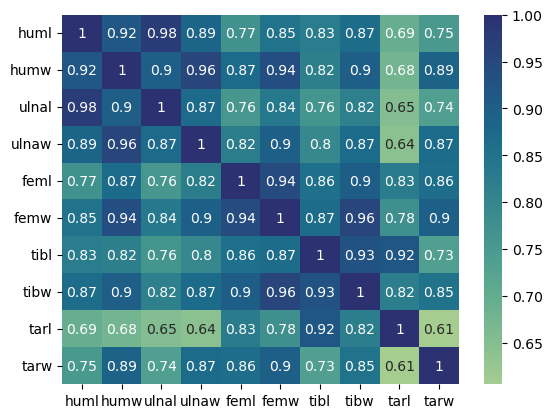

In [123]:
correlation = data[numeric_columns].corr()
sns.heatmap(correlation, annot=True, cmap="crest")

On remarque que les attributs ont une grande corrélation entre eux donc qu'ils sont redondants et qu'ils peuvent être réduits pour éviter le surapprentissage.

Ce graphique nous permet de voir la distribution des classes par rapport à chaque attribut


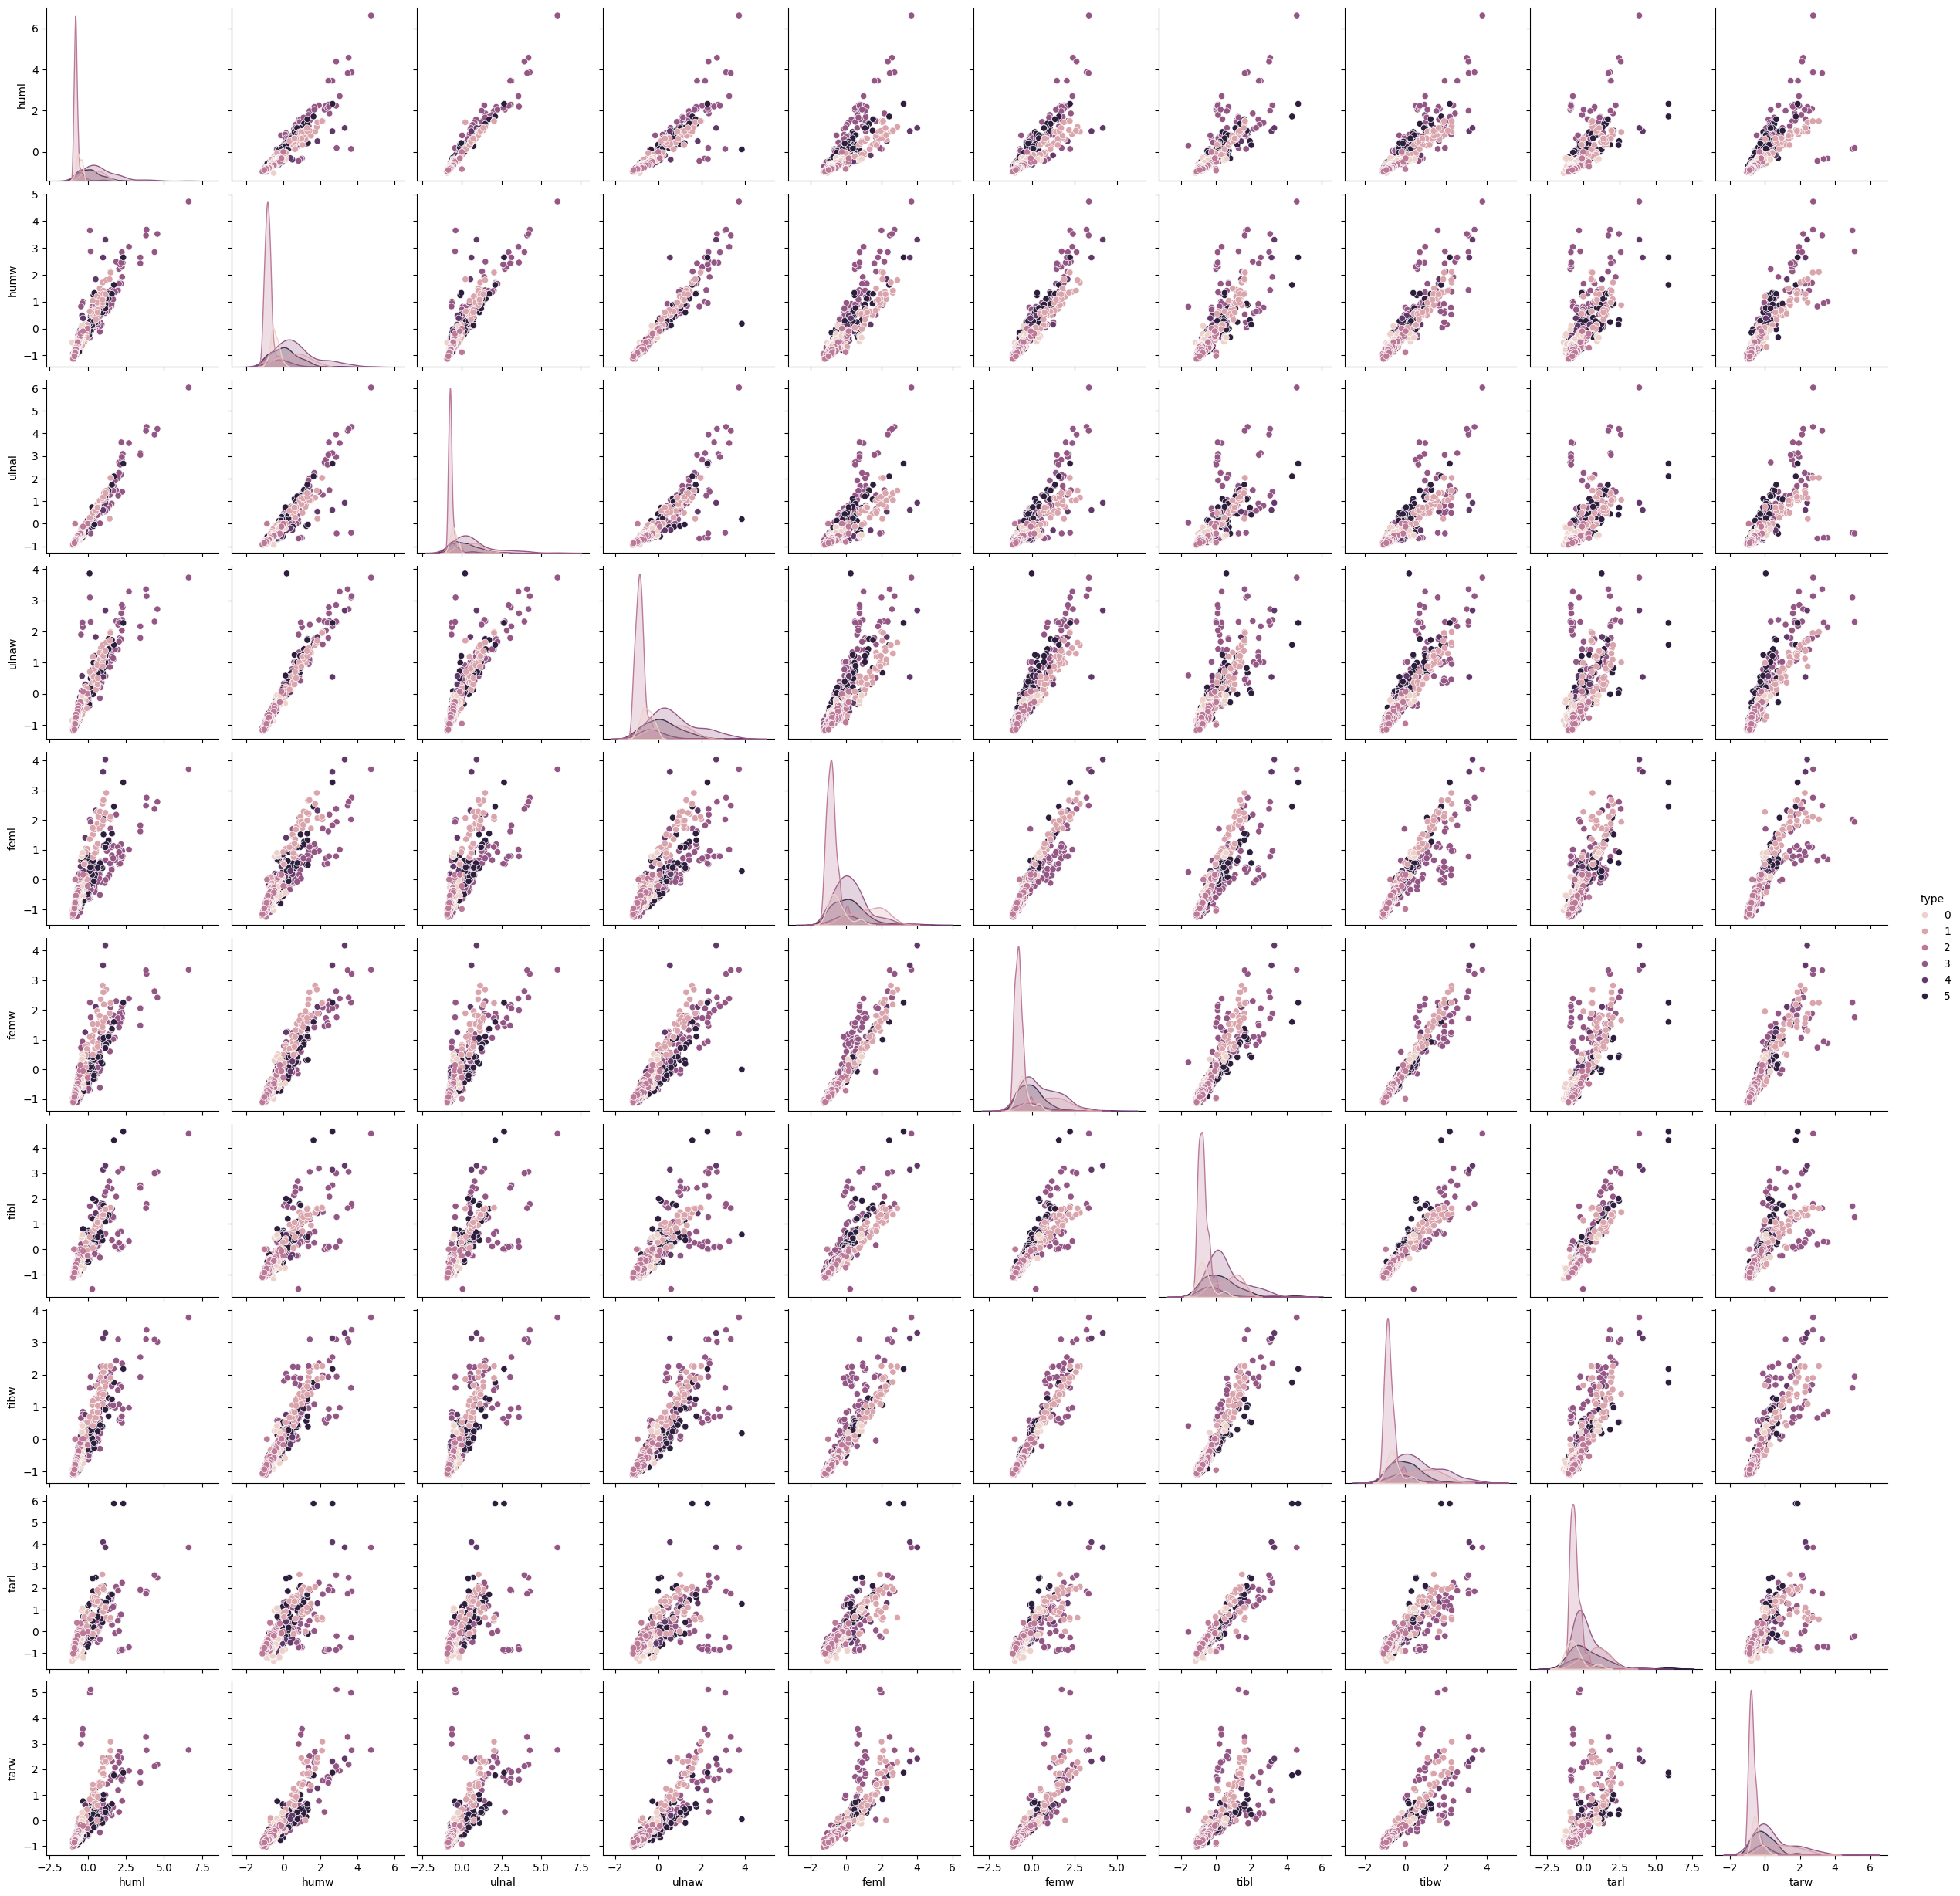

In [233]:
sns.pairplot(data, hue="type")
print("Ce graphique nous permet de voir la distribution des classes par rapport à chaque attribut")

## Analyse des composantes principales

In [125]:
print("Nous avons utilisé la méthode ACP pour réduire la dimensionnalité des données.")
pca = PCA(n_components=10)
pca.fit(data[numeric_columns])

Nous avons utilisé la méthode ACP pour réduire la dimensionnalité des données.


PCA(n_components=10)

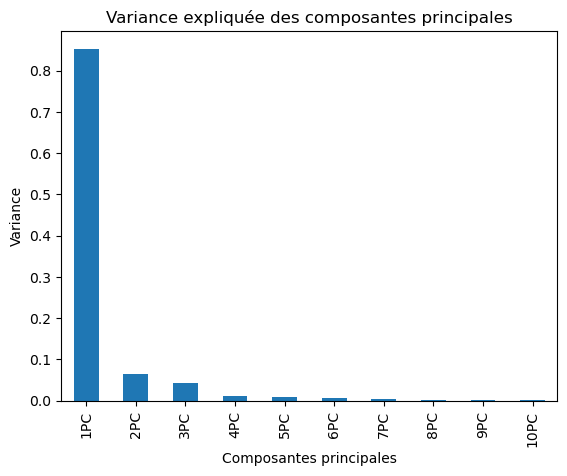

On remarque que les trois premières composantes principales expliquent la majorité de la variance des données.


In [126]:
pca_ratio = pd.Series(pca.explained_variance_ratio_)

mylabels = [str(j+1)+"PC" for j in range(10)]
pca_ratio.plot(kind = 'bar')
plt.xticks(np.arange(10), mylabels)
plt.title("Variance expliquée des composantes principales")
plt.ylabel("Variance")
plt.xlabel("Composantes principales")
plt.show()
print("On remarque que les trois premières composantes principales expliquent la majorité de la variance des données.")

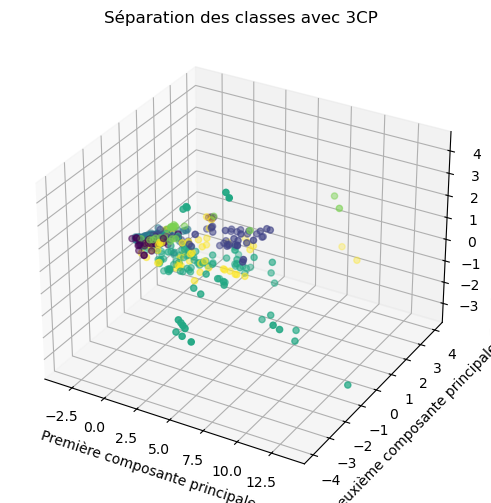

In [127]:
X_PCA = pca.transform(data[numeric_columns])

labels = data["type"].tolist()
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_PCA[:, 0], X_PCA[:, 1], X_PCA[:, 2], c=labels, cmap='viridis')
ax.set_xlabel('Première composante principale')
ax.set_ylabel('Deuxième composante principale')
ax.set_zlabel('Troisième composante principale')
plt.title('Séparation des classes avec 3CP')
plt.show()

On remarque que les classes ne sont pas bien séparées, donc on peut conclure que les trois premières composantes principales ne sont pas suffisantes pour bien séparer les classes.

## Classification des données

### Données

On prépare nos données d'entraînement et de test en utilisant la méthode `train_test_split` avec un ratio de 66% pour les données d'entraînement et 33% pour les données de test.

In [128]:
X = data[numeric_columns]
y = data["type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### KNN-Voisins

#### Paramètres naïfs

In [129]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(f"Précision du modèle KNN sur les données : {knn.score(X_test, y_test)}")

Précision du modèle KNN sur les données : 0.7338129496402878


#### Paramètres optimisés avec GridSearch

In [131]:
parameters = {
    'n_neighbors':np.arange(1,11),
    'metric': ["minkowski", "euclidean", "cityblock"]
}

knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn, parameters, scoring="accuracy", error_score='raise')
knn_gs.fit(X_train, y_train)

s, p = knn_gs.score(X_test, y_test), knn_gs.best_params_
print(f"Meilleurs paramètres : {p}")
print(f"Précision du modèle KNN avec les meilleurs paramètres : {s}")

Meilleurs paramètres : {'metric': 'cityblock', 'n_neighbors': 1}
Précision du modèle KNN avec les meilleurs paramètres : 0.8345323741007195


### Régression logistique

#### Paramètres naïfs

In [132]:
lr = LogisticRegression(random_state=42, C=5, max_iter=1000, solver='liblinear')
lr.fit(X_train, y_train)
print(f"Précision du modèle de regression logistique sur les données : {lr.score(X_test, y_test)}")

Précision du modèle de regression logistique sur les données : 0.8057553956834532


#### Paramètres optimisés avec GridSearch

In [133]:
parameters = {
    'penalty':['l1', 'l2'], 
    'C': np.logspace(-3, 1, 20)
}

lr_gs = GridSearchCV(lr, parameters, scoring="accuracy", error_score='raise')
lr_gs.fit(X_train, y_train)
s, p = lr_gs.score(X_test, y_test), lr_gs.best_params_

print(f"Meilleurs paramètres : {p}")
print(f"Précision du modèle de regression logistique avec les meilleurs paramètres : {s}")

Meilleurs paramètres : {'C': 10.0, 'penalty': 'l1'}
Précision du modèle de regression logistique avec les meilleurs paramètres : 0.8848920863309353


### Centroïdes

#### Paramètres naïfs

In [134]:
ct = NearestCentroid()
ct.fit(X_train, y_train)
print(f"Précision du modèle du centroïde le plus proche sur les données : {ct.score(X_test, y_test)}")

Précision du modèle du centroïde le plus proche sur les données : 0.48201438848920863


#### Paramètres optimisés avec GridSearch

In [135]:
parameters = {
    'metric': ["euclidean", "manhattan"]
}

ct_gs = GridSearchCV(ct, parameters, scoring="accuracy", error_score='raise', refit=True)
ct_gs.fit(X_train, y_train)
s, p = ct_gs.score(X_test, y_test), ct_gs.best_params_

print(f"Meilleurs paramètres : {p}")
print(f"Précision du modèle du centroïde le plus proche avec les meilleurs paramètres : {s}")

Meilleurs paramètres : {'metric': 'manhattan'}
Précision du modèle du centroïde le plus proche avec les meilleurs paramètres : 0.49640287769784175


### Réseau de neurones

#### Paramètres naïfs

In [136]:
clf = MLPClassifier(max_iter=10000, random_state=1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9064748201438849

#### Paramètres optimisés avec GridSearch

In [137]:
parameters = {
    'solver': ['lbfgs', 'sgd', 'adam']
}

clf_gs = GridSearchCV(clf, parameters, scoring="accuracy", error_score='raise', refit=True)
clf_gs.fit(X_train, y_train)
s, p = clf_gs.score(X_test, y_test), clf_gs.best_params_

print(f"Meilleurs paramètres : {p}")
print(f"Précision du modèle du réseau de neurones avec les meilleurs paramètres : {s}")

Meilleurs paramètres : {'solver': 'lbfgs'}, précision : 0.8561151079136691
